# Histogram

A histogram is a graph (usually displayed as bars) that displays how often an element appears in an array. For images, this means how often each pixel value shows up. It is usually displayed in every microscopy software.

It is a useful additional tool to explore images.

## Exploring the data

Before defining an image analysis workflow, it is really important to explore the data. The simplest way is, of course, displaying the images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.io import imread
from skimage.exposure import histogram

Take the following example. We will create an array withsome values:

In [2]:
array = np.ones((3,7))*64 # Creates a numpy array containing 'ones' and multiply it by 64
array[:2,:4] = 60 # Atribute the value 60 to some pixels
array[:,5:] = 192 # Atribute the value 192 to some pixels

Since it is a small array, we can print it to check the values:

In [3]:
print(array)

[[ 60.  60.  60.  60.  64. 192. 192.]
 [ 60.  60.  60.  60.  64. 192. 192.]
 [ 64.  64.  64.  64.  64. 192. 192.]]


Now, let's display it as an image.

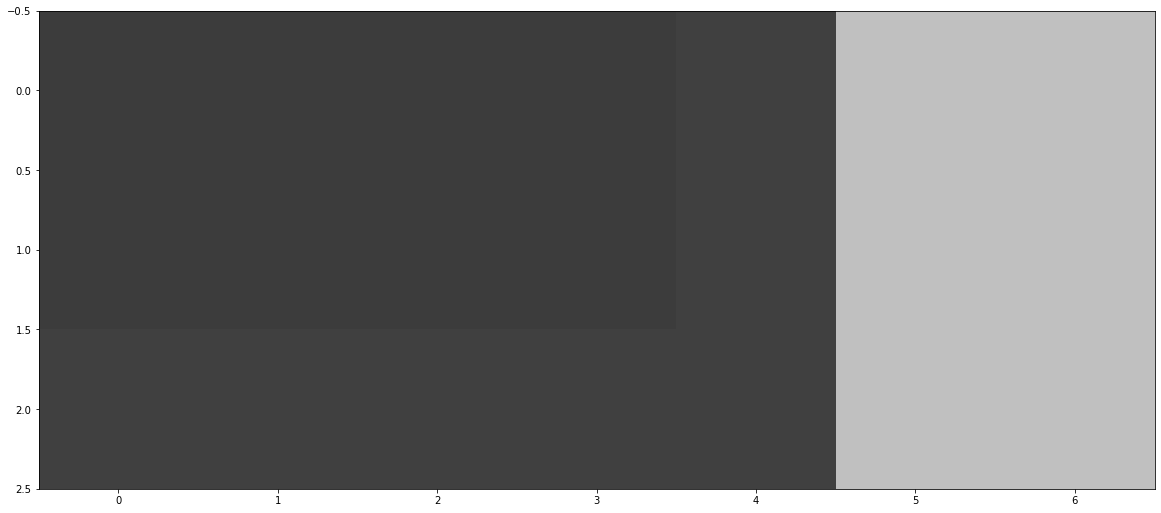

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(array, cmap='gray', vmin=0, vmax=255) # vmin and vmax set the range of the colormap

Which of these values occur more often? Unless we print the values or count them, it may be difficult to tell just by looking at it. Imagine for bigger images!

For that, we can look at the pixel values from another perspective. One way to do that is to plot the image histogram.

## Histogram

Let's plot the histogram of the array/image we created before. We can do this with scikit-image and matplotlib.

First, we use the `histogram()` function from scikit-image to get pixel values and pixel count.

In [5]:
piexl_counts, pixel_values = histogram(array)

Then we pass these results to `plt.bar()` function to plot the histogram as a bar graph.

<BarContainer object of 256 artists>

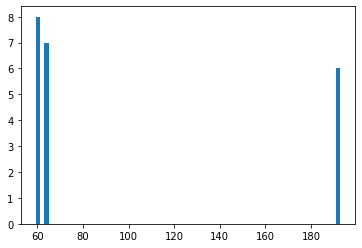

In [6]:
plt.bar(pixel_values, piexl_counts, width=2)

Unlike in the image, just by looking at this graph we can clearly see that we have **three** differnt intensities, and that the the most frequent one is the value 60.

## Image Histogram

What about more complicated images?
In that case, we may be able to differentiate background and foreground as two "clusters" of pixel values. Take the example below:

In [7]:
image_path = '../data/mitosis_mod.tif'

In [8]:
image_cells = imread(image_path)

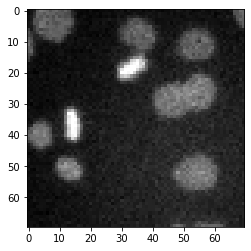

In [9]:
plt.imshow(image_cells, cmap='gray')

<BarContainer object of 248 artists>

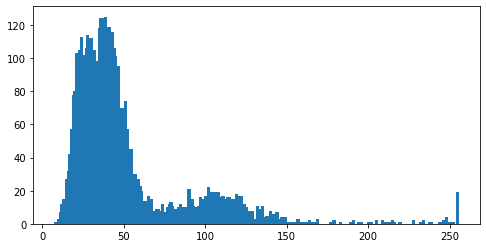

In [10]:
plt.figure(figsize=(8,4)) # Create an empty figure with a specific screen size
pixel_counts, pixel_values = histogram(image_cells) # Calculate the image histogram
plt.bar(pixel_values, pixel_counts, width=2) # Plot the histogram

The first big group to the left corresponds to small value pixels, which in this case is the background. There is a second cluster at between 70 and 150, which corresponds to the cells (foreground), because they are brighter than the background.

Then there are small peak at the very end, more specifically, at 255. This is evidence that we have saturated pixels in the image, most likely corresponding to the dividing cells.